## 1. Perkenalan 

Nama : Evan Aprillio B  
Batch : RMT-19  

Problem Statement : Kamu adalah seorang data scientist di sebuah perusahaan E-commerce yang terfokus untuk menjual pakaian dengan tipe penjualan secara subscription. Tahun lalu banyak customer yang menghentikan pembelian mereka tanpa diketahui sebabnya. Oleh karena itu kamu diminta untuk membuat sebuah model machine learning untuk untuk memprediksi customer mana yang mempunyai kemungkinan paling besar untuk churn(berhenti). 

Objective : 
1. Membuat model machine learning dengan metric utama accuracy atau f1 score
2. Mengetahui ciri-ciri customer yang akan churn dan cara menanggulanginya  


>Link Hunggingface:  

https://huggingface.co/spaces/EvanAB/Churn_Prediction_EvanAB_RMT-19

## 2. Import Library

In [1]:
#import library normal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Feature Selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from scipy.stats import chi2_contingency



# metric classification
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, f1_score, roc_curve, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score 


#import Sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#FE
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import PowerTransformer


#import tensor
import tensorflow as tf
#create squential api
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input,concatenate
from tensorflow.keras import Model
from tensorflow.keras.layers import LeakyReLU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

#save
import pickle
import json
import warnings

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18168635171851104431
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2233204736
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10763227530874019014
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650 SUPER, pci bus id: 0000:08:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


## 3. Data Loading

### Import Data

In [2]:
df=pd.read_csv("churn.csv")
df.head(5)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


### Data Description

|Column	|Description|
|-----------------------|------------------------|
|user_id  |  ID of a customer
|age|	Age of a customer
|gender	|Gender of a customer
|region_category|	Region that a customer belongs to|
|membership_category|	Category of the membership that a customer is using|
|joining_date|	Date when a customer became a member|
|joined_through referral|	Whether a customer joined using any referral code or ID|
|preferred_offer types|	Type of offer that a customer prefers|
|medium_of operation|	Medium of operation that a customer uses for transactions|
|internet_option|	Type of internet service a customer uses|
|last_visit_time|	The last time a customer visited the website|
|days_since_last_login|	Number of days since a customer last logged into the website|
|avg_time_spent|	Average time spent by a customer on the website|
|avg_transaction_value|	Average transaction value of a customer|
|avg_frequency_login_days|	Number of times a customer has logged in to the website|
|points_in_wallet|	Points awarded to a customer on each transaction|
|used_special_discount|	Whether a customer uses special discounts offered|
|offer_application_preference|	Whether a customer prefers offers|
|past_complaint|	Whether a customer has raised any complaints|
|complaint_status|	Whether the complaints raised by a customer was resolved|
|feedback|	Feedback provided by a customer|
|churn_risk_score|	Churn score 0 : Not churn 1 : Churn|

## 4. EDA

In [3]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


jika dilihat dari deskripsi data dicurigai days_since_last_login, avg_time_spent akan memiliki distribusi yang tidak normal

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

user_id tidak akan diperlukan saat pemodelan atau eksplorasi data sehingga akan di drop

In [5]:
df = df.drop('user_id', axis=1)
df.head(1)

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,...,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1


In [6]:
df["membership_category"].value_counts()

Basic Membership       7727
No Membership          7693
Gold Membership        6799
Silver Membership      5991
Premium Membership     4458
Platinum Membership    4342
Name: membership_category, dtype: int64

In [7]:
#melihat data duplikat
df.duplicated().sum()

18

In [8]:
#hapus data duplikat dan cek kembali
df = df.drop_duplicates()
df.duplicated().sum()

0

In [9]:
#mencari nilai null
df.isnull().sum()

age                                0
gender                            59
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

terdapat banyak nilai null nanti akan diputuskan untuk drop data null atau dihandling dengan cara lain

In [10]:
#melihat isi data yang memiliki missing value
df_NaN = df[df.isnull().any(axis=1)]
df_NaN

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
4,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
5,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,14:50:53,...,1397.318999,29664.01,28.0,782.49,No,Yes,Yes,Unsolved,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37001,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,17:42:11,...,34.790000,30820.83,23.0,631.83,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,02:31:18,...,499.510000,17110.71,24.0,587.01,Yes,No,No,Not Applicable,Poor Customer Service,1
37005,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37007,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0


__Saya tidak menemukan adanya pola dalam data yang ada missing value jadinya saya menganggapnya missing valuenya bertipe itu Missing At Random(MAR)__

In [11]:
#membuat kolom numerik untuk visualisasi
num_columns=["age","days_since_last_login","avg_time_spent",
             "avg_transaction_value","avg_frequency_login_days","points_in_wallet"]
cat_columns=['gender','region_category','membership_category','joining_date','joined_through_referral',
             'preferred_offer_types','medium_of_operation','internet_option','last_visit_time',
             'used_special_discount','offer_application_preference','past_complaint','complaint_status',
             'feedback','churn_risk_score']

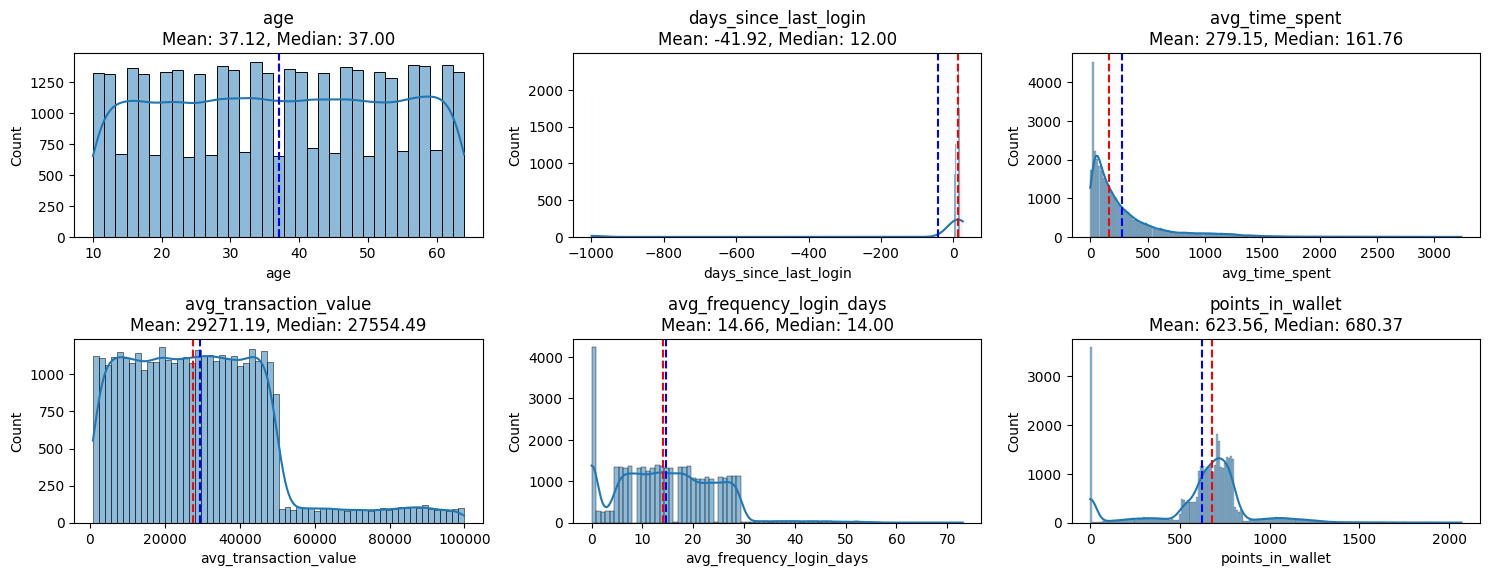

In [12]:
# Create figure and axes
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 14))

# Plot histograms with KDE
for i, column in enumerate(num_columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i//3, i%3])
    mean_value = df[column].mean()
    median_value = df[column].median()
    axes[i//3, i%3].set_title(f"{column}\nMean: {mean_value:.2f}, Median: {median_value:.2f}")
    axes[i//3, i%3].axvline(median_value, color='r', linestyle='--')
    axes[i//3, i%3].axvline(mean_value, color='b', linestyle='--')

# Remove unused subplots
for k in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[k])



# Display the plot
plt.tight_layout()
plt.show()

1. days_since_last_login memiliki kemiringan yang sangat besar

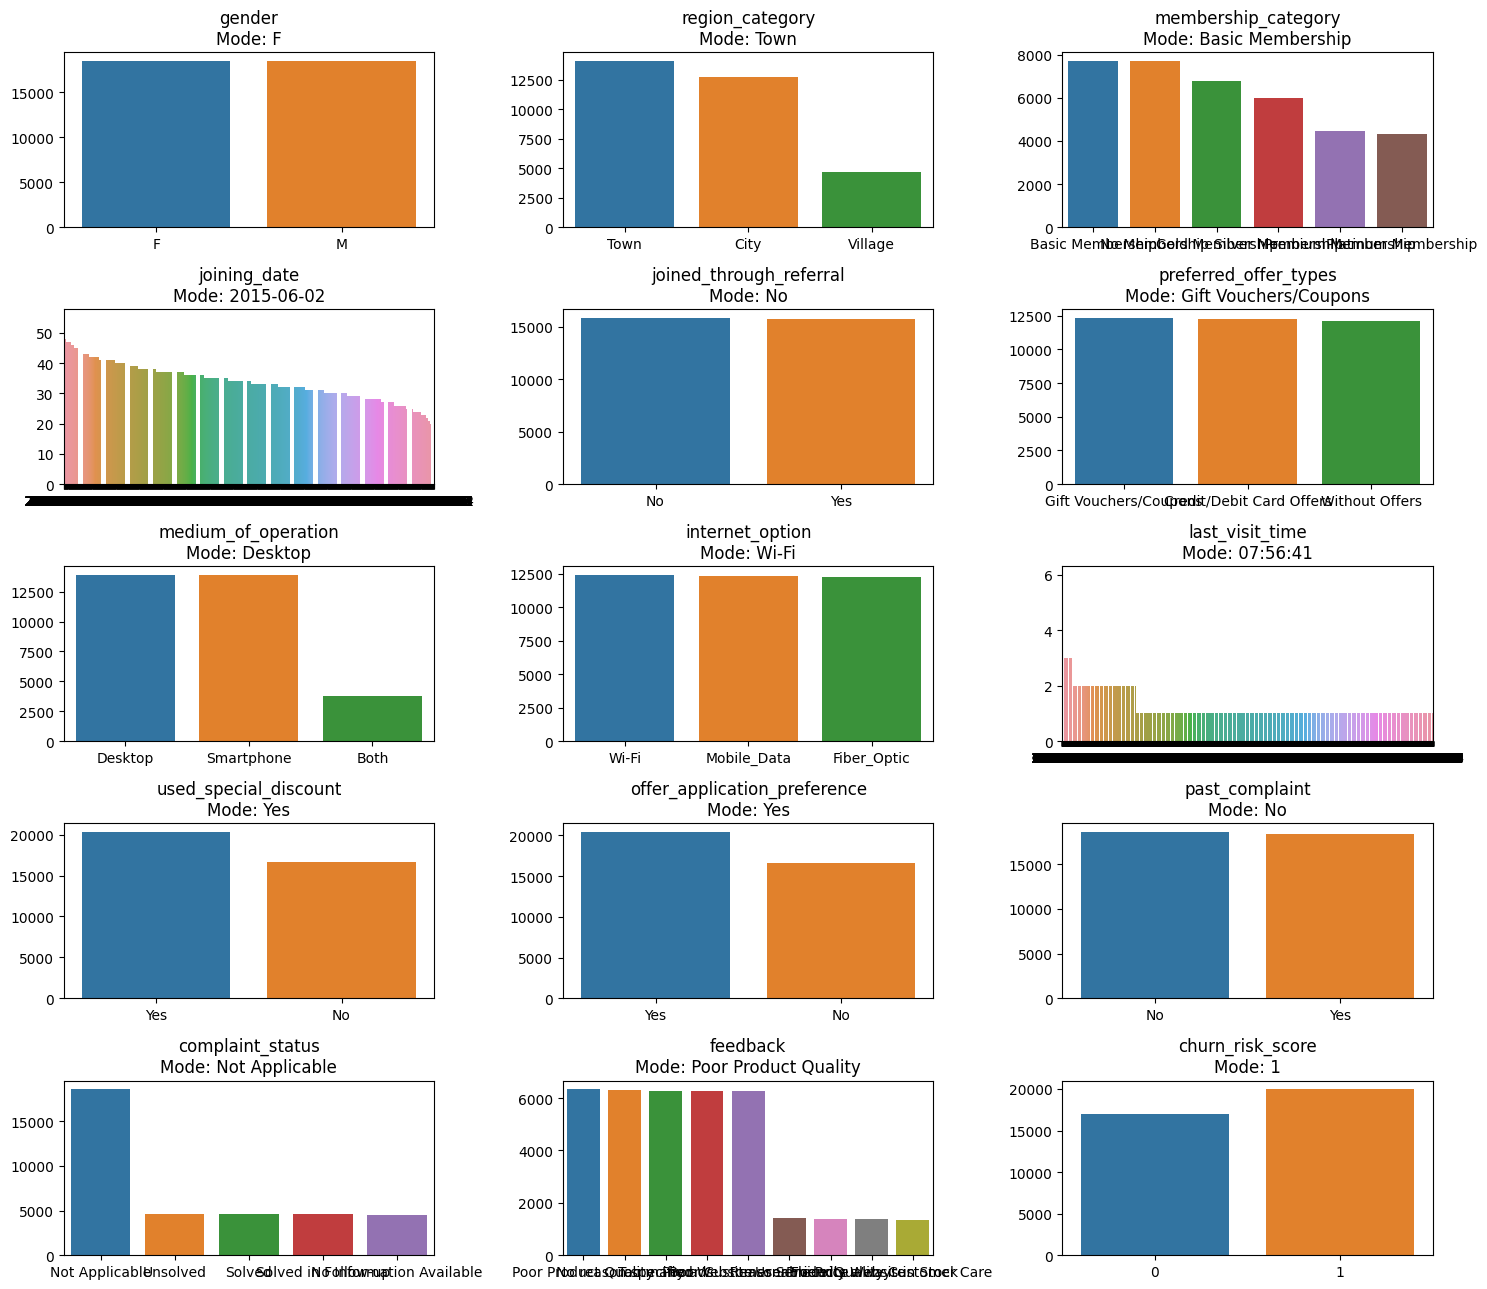

In [13]:
# Membuat figure dan axes
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 13))

# Plot barplot dengan nilai hitungan sebagai nilai y
for i, column in enumerate(cat_columns):
    counts = df[column].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i//3, i%3])
    mode_value = df[column].mode().values[0]
    axes[i//3, i%3].set_title(f"{column}\nMode: {mode_value}")

# Menghapus subplot yang tidak digunakan
for ax in axes.flatten()[len(cat_columns):]:
    ax.remove()

# Menampilkan plot
plt.tight_layout()
plt.show()


1. jika dilihat ada beberapa kolom categori yang memiliki cukup banyak cardinality, seperi feedback
2. banyak kolom yang memiliki persebaran yang hampir sama seperti gender,churn_risk_score,internet_option, dan lain-lain. 

In [14]:
#melihat skewness dari setiap kolom numerik
df.skew()

C:\Users\Evan\AppData\Local\Temp\ipykernel_1600\3950013580.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


age                        -0.007319
days_since_last_login      -3.941356
avg_time_spent              2.276549
avg_transaction_value       1.011027
avg_frequency_login_days    0.389861
points_in_wallet           -0.773492
churn_risk_score           -0.164487
dtype: float64

In [15]:
#membuat variabel jenis kelamin
male= df[(df["gender"] == "F")]
female = df[(df["gender"] == "M")]
counts_male = male["churn_risk_score"].value_counts()
counts_female = female["churn_risk_score"].value_counts()
counts_df= df["churn_risk_score"].value_counts()

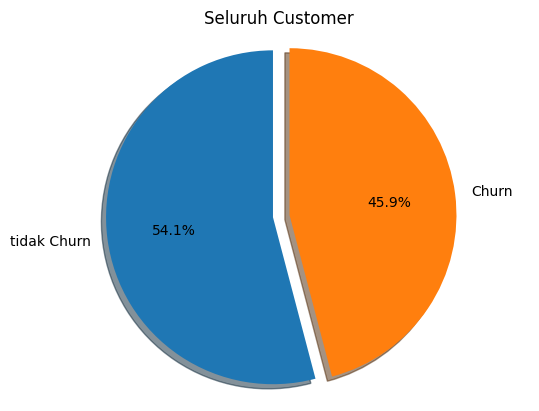

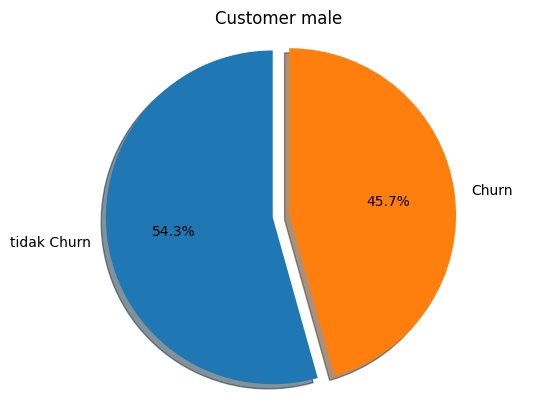

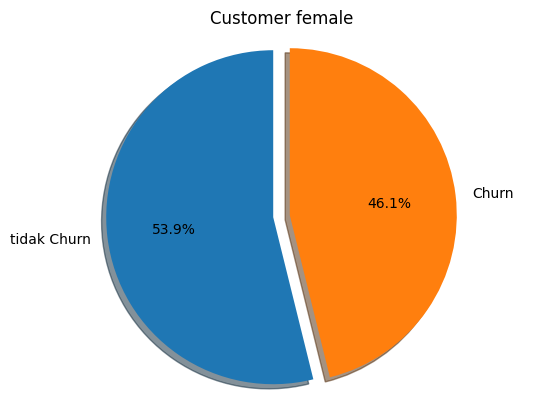

In [16]:
#membuat piechart yang berisi kematian pada setiap jenis kelamin
labels = ["tidak Churn", "Churn"]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(counts_df, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Seluruh Customer ')
plt.show()

fig1, ax1 = plt.subplots()
ax1.pie(counts_male, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Customer male ')
plt.show()

fig1, ax1 = plt.subplots()
ax1.pie(counts_female, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Customer female")
plt.show()


jika dilihat dari plot tidak ada pengaruh kolom gender terhadap apakah customer akan churn atau tidak

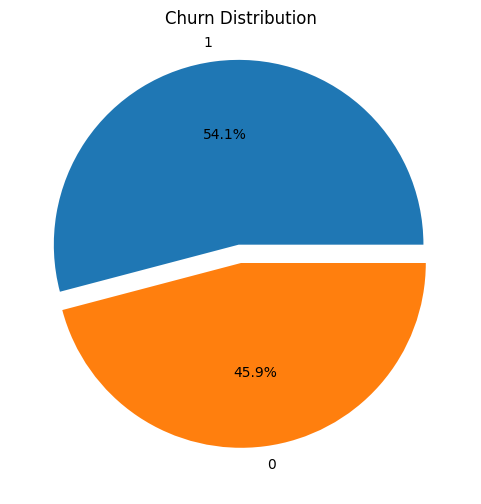

In [17]:
gender_counts = df['churn_risk_score'].value_counts()

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts.values, explode=explode,labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.show()

churn risk scorenya juga memiliki data yang seimbang

## 5. Feature Selection

Saya akan melakukan splitting,encoding,dan scaling untuk keperluan feature selection saja di bab ini. karena jika saat dilakukan feature selection ditemukan bahwa feature-feature terbaik adalah feature yang tidak ada data nullnya, saya tidak akan drop atau impute data nullnya

### Splitting Data

In [18]:
# Memisahkan variabel independen (X) dan dependen (y)
X = df.drop(['churn_risk_score'], axis=1)
y = df['churn_risk_score']

In [19]:
#Memisahkan data menjadi train, val, test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=4,stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=4,stratify=y_train)

### Handling Missing Value

In [20]:
#cek missing value setiap set
print("X_train null= ",X_train.isnull().sum())
print("_____________________________________________")
print("X_val null= ",X_val.isnull().sum())


X_train null=  age                                0
gender                            43
region_category                 3904
membership_category                0
joining_date                       0
joined_through_referral         3945
preferred_offer_types            213
medium_of_operation             3842
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64
_____________________________________________
X_val null=  age                               0
gender                           10
region_category                 972
membership_category               0
joining_date                 

In [21]:
# Cari X_test Missing Value
print("X_test null= ",X_test.isnull().sum())

X_test null=  age                               0
gender                            6
region_category                 552
membership_category               0
joining_date                      0
joined_through_referral         548
preferred_offer_types            31
medium_of_operation             562
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64


Karena missing value saat EDA saya tetapkan sebagai Missing At Random (MAR), saya akan handling missing value dengan di drop saja karena ditakutkan jika dimpute maka akan menghasilkan data yang bias, dan juga fitur-fitur yang memiliki missing value kebanyakan merupakan kolom yang saat EDA memiliki persebaran yang hampir sama

In [22]:
#saya akan menggabungkan data Train karena akan saya drop dan dilihat korelasinya
train_concat = pd.concat([X_train, y_train], axis=1)
train_concat.shape

(26633, 21)

In [23]:
train_concat_drop=train_concat.dropna()
train_concat_drop.shape

(16474, 21)

dilihat ada banyak data yang ter drop yaitu sebesar 10rb data, tapi menurut saya itu diperlukan karena untuk melihat korelasi yang tidak bias,

### Handling Outlier


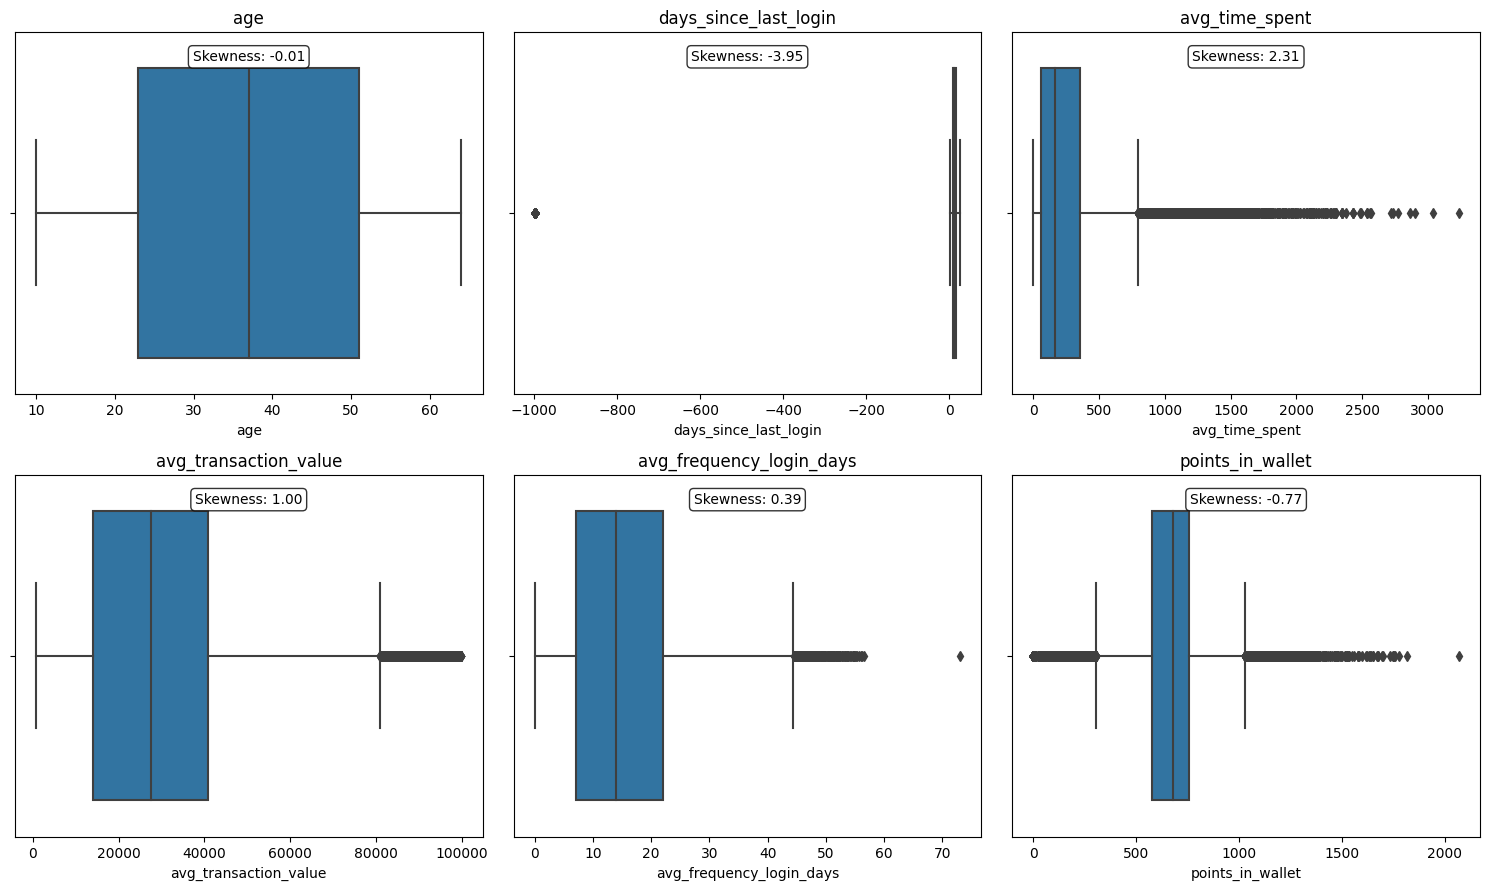

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 13))

# Plot boxplot
for i, column in enumerate(num_columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x=X_train[column], ax=ax)
    skewness = X_train[column].skew()
    ax.text(0.5, 0.95, f'Skewness: {skewness:.2f}', transform=ax.transAxes,
            horizontalalignment='center', verticalalignment='top',
            bbox={'boxstyle': 'round', 'facecolor': 'white', 'alpha': 0.8})
    ax.set_title(column)

# Menghapus subplot yang tidak digunakan
for ax in axes.flatten()[len(num_columns):]:
    ax.remove()

# Menampilkan plot
plt.tight_layout()
plt.show()

jika dilihat dari boxplot ada beberapa fitur yang mempunyai outlier yang cukup yaitu adalah days_since_last_login jadi saya handlingnya akan menggunakan yeo johnson

### Feature Selection

Karena ini untuk feature selection, saya akan menggunakan data yang sudah di train yang sudah di drop terlebih dahulu

In [25]:
# Memisahkan variabel independen (X) dan dependen (y)
X_train_drop = train_concat_drop.drop(['churn_risk_score'], axis=1)
y_train_drop = train_concat_drop['churn_risk_score']

In [26]:
num_columns_fe=["age","days_since_last_login","avg_time_spent",
             "avg_transaction_value","avg_frequency_login_days","points_in_wallet"]
cat_columns_fe=['gender','region_category','membership_category','joined_through_referral',
             'preferred_offer_types','medium_of_operation','internet_option',
             'used_special_discount','offer_application_preference','past_complaint','complaint_status',
             'feedback']
list_col_transform = ['days_since_last_login']

In [27]:
X_train_drop_num=X_train_drop[num_columns_fe]
X_train_drop_cat=X_train_drop[cat_columns_fe]

C:\Users\Evan\AppData\Local\Temp\ipykernel_1600\2374082377.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_drop_num[col] = transformer.fit_transform(X_train_drop_num[col].values.reshape(-1, 1))


<Axes: xlabel='days_since_last_login'>

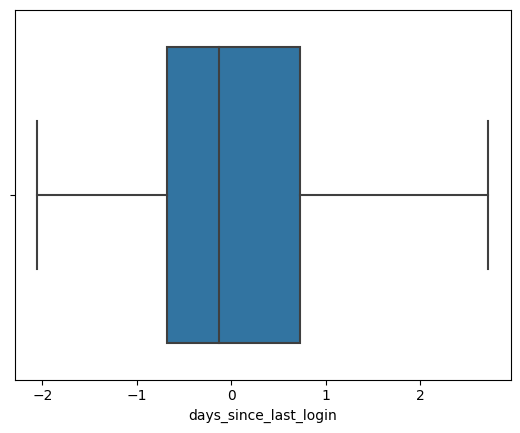

In [28]:
# Membuat objek PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')

# Melakukan transformasi Yeo-Johnson pada kolom tertentu
for col in list_col_transform:
    X_train_drop_num[col] = transformer.fit_transform(X_train_drop_num[col].values.reshape(-1, 1))

sns.boxplot(x=X_train_drop_num["days_since_last_login"])

outlier sudah tidak ada, saya memilih menggunakan metode yeo_johnson karena jika menggunakan winsorizer, data tidak akan berubah karena terlalu banyak data yang memiliki nilai 0

In [29]:
# reset index 
X_train_drop_cat.reset_index(drop=True, inplace=True)
X_train_drop_num.reset_index(drop=True, inplace=True)
y_train_drop.reset_index(drop=True, inplace=True)

#### Feature Scaling for Feature Selection

Saya menggunakan Ordinal Encoder karena menurut saya ada banyak kolom yang merupakan kolom categori ordinal, sehingga jika dipakai menggunakan label encoder akan percuma, dan jika menggunakan onehot akan membuat program menjadi berat

In [30]:
# Membuat Variabel Scaler
numeric_transformer = StandardScaler()
categoric_transformer = OrdinalEncoder(categories=[["F","M"],
                                                    ["Village","Town","City"],
                                                    ['No Membership','Basic Membership','Silver Membership','Gold Membership','Premium Membership','Platinum Membership'],
                                                    ["No","Yes"],
                                                    ['Without Offers','Gift Vouchers/Coupons','Credit/Debit Card Offers'],
                                                    ["Desktop","Smartphone","Both"],
                                                    ['Mobile_Data','Wi-Fi','Fiber_Optic'],
                                                    ["No","Yes"],
                                                    ["No","Yes"],
                                                    ["No","Yes"],
                                                    ["No Information Available",'Not Applicable','Unsolved','Solved in Follow-up','Solved'],
                                                    ['Too many ads','Poor Product Quality', 'Poor Customer Service','Poor Customer Service','Poor Website','No reason specified','User Friendly Website','Products always in Stock','Quality Customer Care', 'Reasonable Price']])

#scaling
numeric_transformer.fit(X_train_drop_num)
X_train_drop_num_scaled=numeric_transformer.transform(X_train_drop_num)

#Encode
categoric_transformer.fit(X_train_drop_cat)
X_train_drop_cat_encoded= categoric_transformer.transform(X_train_drop_cat)


In [31]:
X_train_drop_cat_encoded

array([[1., 2., 3., ..., 0., 1., 0.],
       [0., 0., 3., ..., 0., 1., 8.],
       [1., 1., 0., ..., 0., 1., 3.],
       ...,
       [0., 2., 2., ..., 0., 1., 9.],
       [1., 2., 0., ..., 1., 2., 1.],
       [0., 2., 4., ..., 0., 1., 8.]])

In [32]:
# concate colum 
X_train_drop_final= np.concatenate([X_train_drop_num_scaled,X_train_drop_cat_encoded], axis=1)


In [33]:
#membuat menjadi df
X_list=['gender','region_category',
        'membership_category','joined_through_referral','preferred_offer_types',
        'medium_of_operation','internet_option','used_special_discount',
        'offer_application_preference','past_complaint','complaint_status','feedback']

X_train_drop_cat_encoded_df=pd.DataFrame(data=X_train_drop_cat_encoded,columns=X_list)
X_train_drop_cat_encoded_df.head(1)

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,1.0,2.0,3.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [34]:
# Seleksi fitur dengan chi-square
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_train_drop_cat_encoded_df, y_train_drop)

cat_scores = pd.DataFrame({'Feature': X_train_drop_cat_encoded_df.columns,
                          'Score': selector.scores_,
                          'p-value': selector.pvalues_.round(4)})

catscores = cat_scores.sort_values(by='Score', ascending=False)

cat_scores

,Feature,Score,p-value
0,gender,0.038494,0.8445
1,region_category,2.398748,0.1214
2,membership_category,11741.101635,0.0000
3,joined_through_referral,7.684133,0.0056
4,preferred_offer_types,6.375603,0.0116
5,medium_of_operation,0.010595,0.9180
6,internet_option,0.130437,0.7180
7,used_special_discount,0.278976,0.5974
8,offer_application_preference,3.571017,0.0588
9,past_complaint,0.130392,0.7180


menurut chi2 fitur-fitur numerik yang mempengaruhi terhadap targat adalah: 
1. membership_category dengan skor 11741.101635 dan nilai p-value 0.0000
2. joined_through_referral dengan skor 7.684133 dan nilai p-value 0.0056
3. preferred_offer_types dengan skor 6.375603 dan nilai p-value 0.0116
4. offer_application_preference dengan skor 3.571017 dan nilai p-value 0.0588
5. feedback dengan skor 3099.750234 dan nilai p-value 0.0000

C:\Users\Evan\AppData\Local\Temp\ipykernel_1600\2696758002.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmapPearson=train_concat_drop.corr(method="pearson")


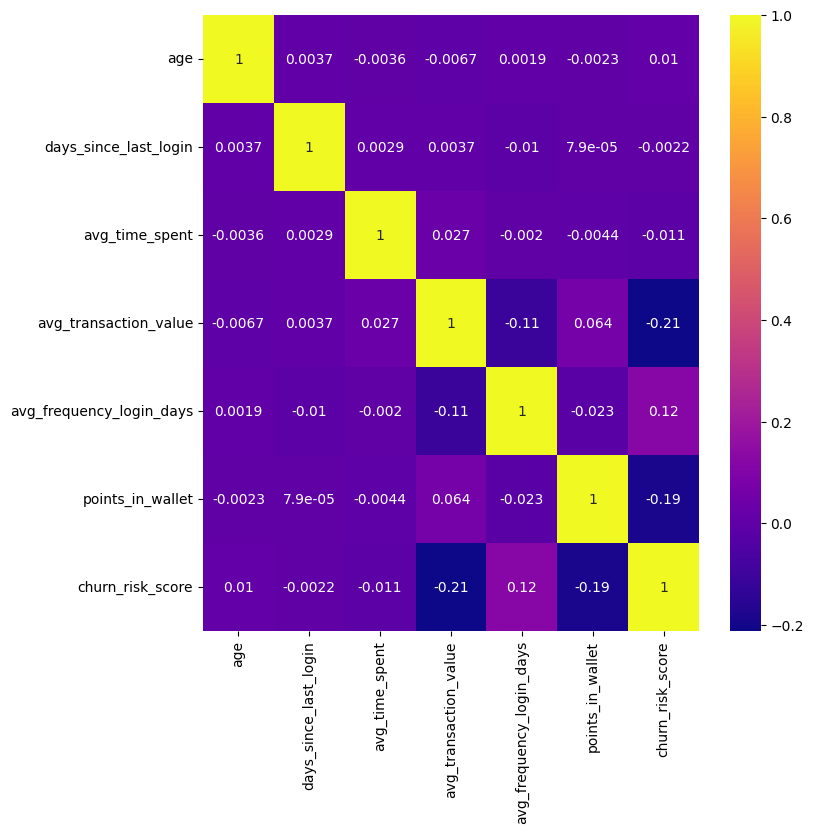

In [35]:
#melihat Korelasi antar kolom numerik
heatmapPearson=train_concat_drop.corr(method="pearson")
fig, ax=plt.subplots(figsize=(8,8))
sns.heatmap(heatmapPearson, annot=True, cmap="plasma",ax=ax)
plt.show()

1. jika dilihat menggunakan pearson fitur numerical yang memiliki corelasi cukup besar (>0.1) terhadap target adalah avg_time_spent, avg_frequency_login_days, dan points_in_wallet

>__Kesimpulan Feature Selection__

feature yang memiliki pengaruh:
1. Points_in_wallet
2. avg_frequency_login_days
3. avg_transaction_value
4. membership_category
5. joined_through_referral
6. preferred_offer_types
7. offer_application
8. feedback

Tetapi karena joined_through_refferral, dan prefere_other_type memiliki banyak nilai null dan saya memilih untuk handlingnya dengan cara drop atau tidak memasukanya kedalam model maka saya akan tidak memakan keduanya sebagai fitur pemodelan


> __Final Feature__
1. points_in_wallet
2. avg_frequency_login_days
3. avg_transaction_value
4. membership_category
5. offer_application_preference
6. feedback

## 6. Feature Enggineering

In [3]:
# Memisahkan variabel independen (X) dan dependen (y)
X = df[["points_in_wallet","avg_frequency_login_days","avg_transaction_value","membership_category",
        "offer_application_preference","feedback"]]
y = df['churn_risk_score']

In [4]:
#Memisahkan data menjadi train, val, test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=4,stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=4,stratify=y_train)

### Handling Missing Value

In [5]:
#cek missing value setiap fitur
print("X_train null= ",X_train.isnull().sum())
print("_____________________________________________")
print("X_val null= ",X_val.isnull().sum())
print("_____________________________________________")
print("X_test null= ",X_test.isnull().sum())
print("_____________________________________________")
#cek missing value setiap target
print("y_train null= ",y_train.isnull().sum())
print("_____________________________________________")
print("y_val null= ",y_val.isnull().sum())
print("_____________________________________________")
print("y_test null= ",y_test.isnull().sum())

X_train null=  points_in_wallet                0
avg_frequency_login_days        0
avg_transaction_value           0
membership_category             0
offer_application_preference    0
feedback                        0
dtype: int64
_____________________________________________
X_val null=  points_in_wallet                0
avg_frequency_login_days        0
avg_transaction_value           0
membership_category             0
offer_application_preference    0
feedback                        0
dtype: int64
_____________________________________________
X_test null=  points_in_wallet                0
avg_frequency_login_days        0
avg_transaction_value           0
membership_category             0
offer_application_preference    0
feedback                        0
dtype: int64
_____________________________________________
y_train null=  0
_____________________________________________
y_val null=  0
_____________________________________________
y_test null=  0


tidak ada missing value

### Handling Outlier

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26647 entries, 27678 to 30830
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   points_in_wallet              26647 non-null  float64
 1   avg_frequency_login_days      26647 non-null  float64
 2   avg_transaction_value         26647 non-null  float64
 3   membership_category           26647 non-null  object 
 4   offer_application_preference  26647 non-null  object 
 5   feedback                      26647 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.4+ MB


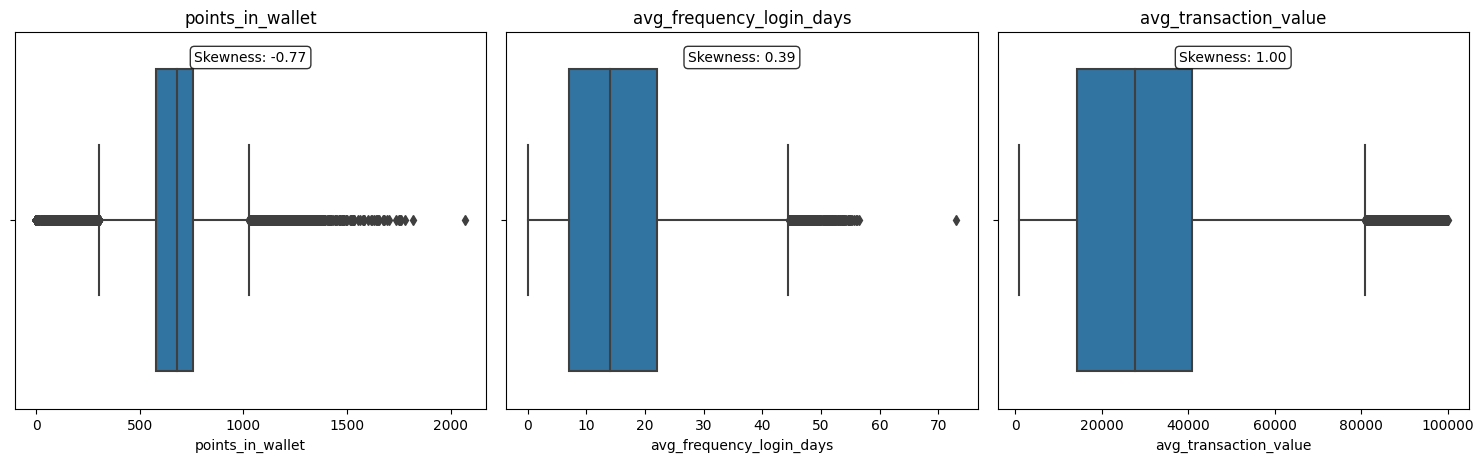

In [40]:
final_num=["points_in_wallet","avg_frequency_login_days","avg_transaction_value"]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 13))

# Plot boxplot
for i, column in enumerate(final_num):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x=X_train[column], ax=ax)
    skewness = X_train[column].skew()
    ax.text(0.5, 0.95, f'Skewness: {skewness:.2f}', transform=ax.transAxes,
            horizontalalignment='center', verticalalignment='top',
            bbox={'boxstyle': 'round', 'facecolor': 'white', 'alpha': 0.8})
    ax.set_title(column)

# Menghapus subplot yang tidak digunakan
for ax in axes.flatten()[len(final_num):]:
    ax.remove()

# Menampilkan plot
plt.tight_layout()
plt.show()

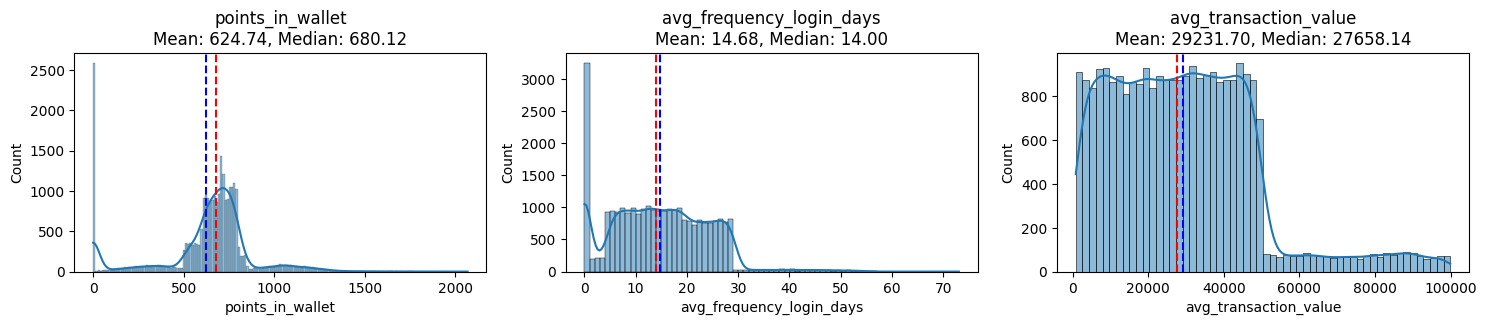

In [41]:
# Create figure and axes
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 14))

# Plot histograms with KDE
for i, column in enumerate(final_num):
    sns.histplot(data=X_train, x=column, kde=True, ax=axes[i//3, i%3])
    mean_value = X_train[column].mean()
    median_value = X_train[column].median()
    axes[i//3, i%3].set_title(f"{column}\nMean: {mean_value:.2f}, Median: {median_value:.2f}")
    axes[i//3, i%3].axvline(median_value, color='r', linestyle='--')
    axes[i//3, i%3].axvline(mean_value, color='b', linestyle='--')

# Remove unused subplots
for k in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[k])



# Display the plot
plt.tight_layout()
plt.show()

saya tidak akan handling outliernya karena menurut saya jika dilihat dari distribusi data,distribusinya masih cukup normal

### Handling Cardinality

Karena saya encoding menggunakan ordinal encoder, maka handling cardinality tidak perlu dilakukan

### Feature Scaling

In [7]:
#list feature cat dan num
final_num=["points_in_wallet","avg_frequency_login_days","avg_transaction_value"]
final_cat=["membership_category","offer_application_preference","feedback"]

In [8]:
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline=make_pipeline(OrdinalEncoder(categories=[['No Membership','Basic Membership','Silver Membership','Gold Membership','Premium Membership','Platinum Membership'],
                                                        ["No","Yes"],
                                                        ['Too many ads','Poor Product Quality', 'Poor Customer Service','Poor Customer Service','Poor Website','No reason specified','User Friendly Website','Products always in Stock','Quality Customer Care', 'Reasonable Price']]))

final_pipeline=ColumnTransformer([
    ("pipe_num",num_pipeline,final_num),
    ("pipe_cat", cat_pipeline,final_cat)
])

In [9]:
X_train_final=final_pipeline.fit_transform(X_train)
X_test_final=final_pipeline.transform(X_test)
X_val_final=final_pipeline.transform(X_val)
X_train_final

array([[ 0.81921531, -0.28150883,  0.69622839,  5.        ,  1.        ,
         8.        ],
       [-0.36134398, -1.54659728,  0.04150661,  1.        ,  1.        ,
         4.        ],
       [ 0.23406116, -1.54659728, -1.32336166,  0.        ,  1.        ,
         0.        ],
       ...,
       [ 0.51791752,  0.77273155, -0.19676898,  3.        ,  1.        ,
         5.        ],
       [ 0.15537195,  1.40527578, -1.36885426,  0.        ,  0.        ,
         5.        ],
       [ 2.08498402, -0.38693286,  0.09375708,  2.        ,  0.        ,
         5.        ]])

## 7. Modelling

### Model Sequential API 1

In [45]:
seed=20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [46]:
model_sequential=Sequential()
model_sequential.add(Dense(18,
                           activation="relu",
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(6,)))#hidden layer pertama
model_sequential.add(Dense(8,
                           activation="relu",
                           kernel_initializer=tf.keras.initializers.HeNormal(seed)))#hidden layer 2

model_sequential.add(Dense(1,
                           activation="sigmoid",
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))#output layer
#compile
model_sequential.compile(loss="binary_crossentropy",
                         optimizer="adam",
                         metrics=["accuracy"])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                126       
                                                                 
 dense_1 (Dense)             (None, 8)                 152       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 287
Trainable params: 287
Non-trainable params: 0
_________________________________________________________________


In [47]:
## Plot layer
tf.keras.utils.plot_model(model_sequential,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [48]:
history_seq=model_sequential.fit(X_train_final,
                                 y_train,
                                 epochs=50,
                                 validation_data=(X_val_final,y_val),
                                 batch_size=10,
                                 callbacks=[callback])

Epoch 1/50
2664/2664 [==============================] - 24s 7ms/step - loss: 0.4387 - accuracy: 0.8040 - val_loss: 0.3118 - val_accuracy: 0.8564
Epoch 2/50
2664/2664 [==============================] - 18s 7ms/step - loss: 0.2985 - accuracy: 0.8570 - val_loss: 0.2760 - val_accuracy: 0.8684
Epoch 3/50
2664/2664 [==============================] - 17s 6ms/step - loss: 0.2596 - accuracy: 0.8869 - val_loss: 0.2356 - val_accuracy: 0.9143
Epoch 4/50
2664/2664 [==============================] - 19s 7ms/step - loss: 0.2296 - accuracy: 0.9147 - val_loss: 0.2132 - val_accuracy: 0.9188
Epoch 5/50
2664/2664 [==============================] - 19s 7ms/step - loss: 0.2184 - accuracy: 0.9209 - val_loss: 0.2057 - val_accuracy: 0.9245
Epoch 6/50
2664/2664 [==============================] - 18s 7ms/step - loss: 0.2125 - accuracy: 0.9227 - val_loss: 0.2050 - val_accuracy: 0.9213
Epoch 7/50
2664/2664 [==============================] - 19s 7ms/step - loss: 0.2088 - accuracy: 0.9231 - val_loss: 0.1981 - val_ac

In [49]:
history_seq_df=pd.DataFrame(history_seq.history)

<Axes: >

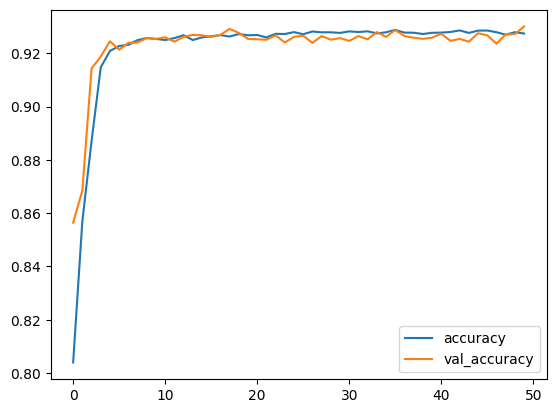

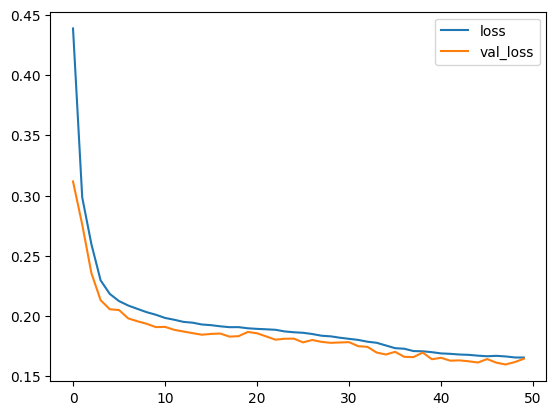

In [50]:
history_seq_df[["accuracy","val_accuracy"]].plot()
history_seq_df[["loss","val_loss"]].plot()

1. Val loss dari test set ada sedikit lonjakan
2. Model jika dilihat akan berpeforma bagus. tapi dilihat dulu di test set nya

833/833 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.95      0.92     12225
           1       0.95      0.92      0.93     14408

    accuracy                           0.93     26633
   macro avg       0.93      0.93      0.93     26633
weighted avg       0.93      0.93      0.93     26633



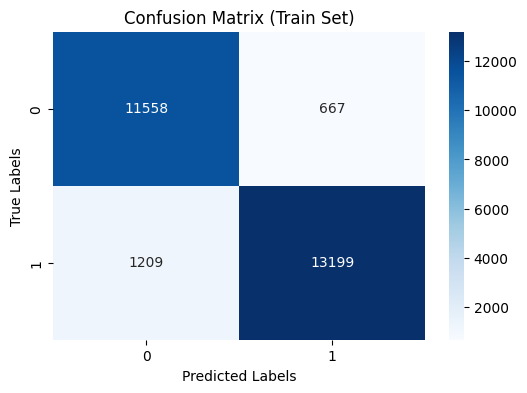

------------------------------------------------------
116/116 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1698
           1       0.95      0.90      0.93      2002

    accuracy                           0.92      3700
   macro avg       0.92      0.92      0.92      3700
weighted avg       0.92      0.92      0.92      3700



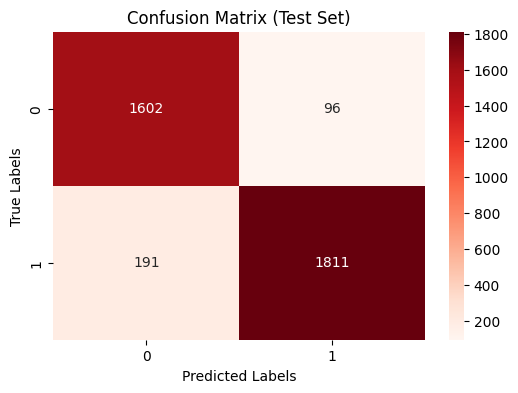

In [51]:
#lihat Classification score
y_pred_train_seq=model_sequential.predict(X_train_final)
y_pred_seq=np.where(y_pred_train_seq >=0.5,1,0)
print(classification_report(y_train,y_pred_seq))
# Confusion matrix untuk train set 
cm_train = confusion_matrix(y_train, y_pred_seq)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print("------------------------------------------------------")
#lihat Classification score
y_pred_test_seq=model_sequential.predict(X_test_final)
y_pred_seq=np.where(y_pred_test_seq >=0.5,1,0)
print(classification_report(y_test,y_pred_seq))
# Confusion matrix untuk test set 
cm_train = confusion_matrix(y_test, y_pred_seq)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


1. Jika dilihat dari hasil score model bersifat goodfit dan dapat memprediksikan dengan baik
2. Model cenderung memberikan nilai false negative dibandingkan false positive

### Functional API

In [52]:
seed=20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [53]:
input_layer=Input(shape=(6,))
hidden_layer_1=Dense(16,
                     activation="relu",
                     kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
hidden_layer_2=Dense(8,
                     activation="relu",
                     kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)

concat_layer=concatenate([input_layer,hidden_layer_2])

output_layer=Dense(1,
                   activation="sigmoid",
                   kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional=Model(inputs=input_layer,outputs=output_layer)

#compile
model_functional.compile(loss="binary_crossentropy",
                         optimizer="adam",
                         metrics="accuracy")

model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           112         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 8)            136         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 14)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [54]:
## Plot layer
tf.keras.utils.plot_model(model_functional,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [55]:

history_func=model_functional.fit(X_train_final,
                                 y_train,
                                 epochs=20,
                                 validation_data=(X_val_final,y_val),
                                 batch_size=10,
                                 callbacks=[callback])

Epoch 1/20
2664/2664 [==============================] - 21s 8ms/step - loss: 0.3897 - accuracy: 0.8208 - val_loss: 0.3100 - val_accuracy: 0.8524
Epoch 2/20
2664/2664 [==============================] - 20s 8ms/step - loss: 0.3059 - accuracy: 0.8494 - val_loss: 0.2952 - val_accuracy: 0.8516
Epoch 3/20
2664/2664 [==============================] - 20s 8ms/step - loss: 0.2945 - accuracy: 0.8512 - val_loss: 0.2844 - val_accuracy: 0.8495
Epoch 4/20
2664/2664 [==============================] - 20s 8ms/step - loss: 0.2779 - accuracy: 0.8601 - val_loss: 0.2569 - val_accuracy: 0.8826
Epoch 5/20
2664/2664 [==============================] - 20s 8ms/step - loss: 0.2498 - accuracy: 0.8954 - val_loss: 0.2301 - val_accuracy: 0.9170
Epoch 6/20
2664/2664 [==============================] - 17s 6ms/step - loss: 0.2284 - accuracy: 0.9163 - val_loss: 0.2201 - val_accuracy: 0.9150
Epoch 7/20
2664/2664 [==============================] - 18s 7ms/step - loss: 0.2166 - accuracy: 0.9218 - val_loss: 0.2045 - val_ac

<Axes: >

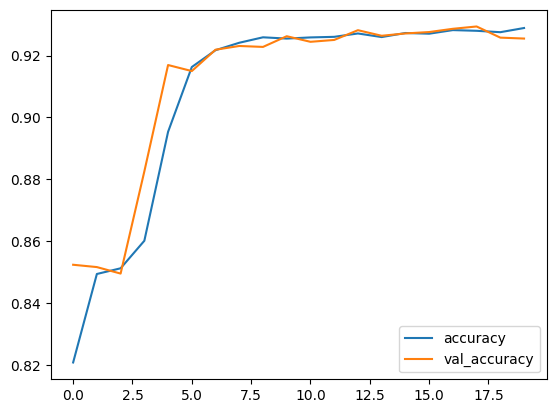

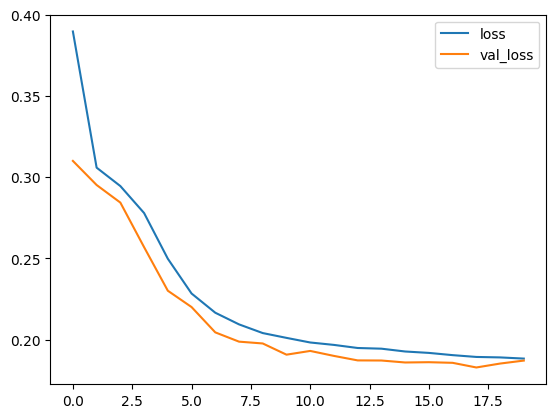

In [56]:
history_func_df=pd.DataFrame(history_func.history)
history_func_df[["accuracy","val_accuracy"]].plot()
history_func_df[["loss","val_loss"]].plot()

model masih belum konfergen penuh jika dilihat dari plotnya

833/833 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     12225
           1       0.91      0.96      0.93     14408

    accuracy                           0.93     26633
   macro avg       0.93      0.92      0.93     26633
weighted avg       0.93      0.93      0.93     26633



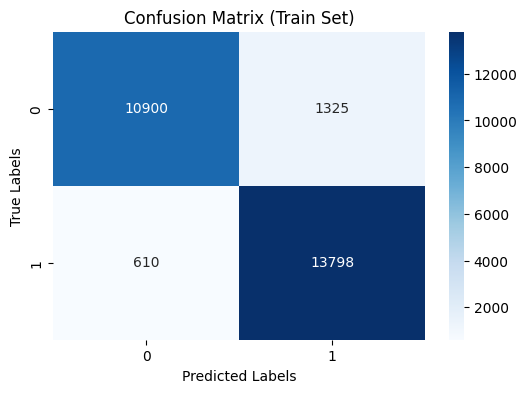

------------------------------------------------------
116/116 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1698
           1       0.91      0.94      0.93      2002

    accuracy                           0.92      3700
   macro avg       0.92      0.92      0.92      3700
weighted avg       0.92      0.92      0.92      3700



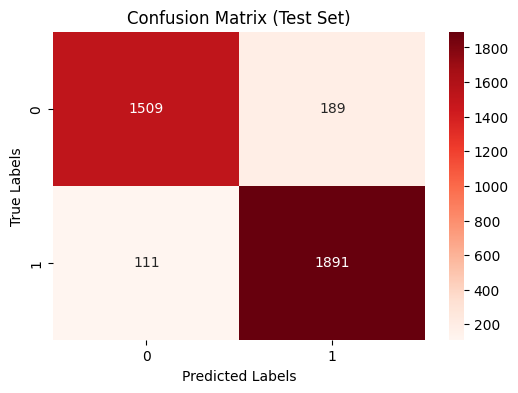

In [57]:
#lihat Classification score
y_pred_train_seq=model_functional.predict(X_train_final)
y_pred_seq=np.where(y_pred_train_seq >=0.5,1,0)
print(classification_report(y_train,y_pred_seq))
# Confusion matrix untuk train set 
cm_train = confusion_matrix(y_train, y_pred_seq)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print("------------------------------------------------------")
#lihat Classification score
y_pred_test_seq=model_functional.predict(X_test_final)
y_pred_seq=np.where(y_pred_test_seq >=0.5,1,0)
print(classification_report(y_test,y_pred_seq))
# Confusion matrix untuk test set 
cm_train = confusion_matrix(y_test, y_pred_seq)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


1. Model cenderung memberikan nilai false positive
2. Saya akan fokus terhadap metric accuracy karena menurut saya nilai recall tidak terlalu penting untuk pemasalahan churn. dan karena data ini memiliki perbandingan churn 1 dan 0 yang seimbang membuat accuracy cocok dipakai karena lebih mudah dijelaskan
3. Untuk Model ini Selanjutnya mungkin biasnya bisa di atur sehingga tidak memiliki bias ke 1

### Model Sequential API 2

Saya akan mencoba menggunakan activation Leaky relu karena dalam data ada nilai minus yang saya duga membuat val_loss di plot menjadi tidak rata


In [10]:
seed=20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [11]:
model_sequential_2=Sequential()
model_sequential_2.add(Dense(12,
                           activation=LeakyReLU(alpha=0.01),
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(6,)))#hidden layer pertama
model_sequential_2.add(Dense(32,
                           activation=LeakyReLU(alpha=0.01),
                           kernel_initializer=tf.keras.initializers.HeNormal(seed)))#hidden layer 2

model_sequential_2.add(Dense(1,
                           activation="sigmoid",
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))#output layer
#compile
model_sequential_2.compile(loss="binary_crossentropy",
                         optimizer="adam",
                         metrics=["accuracy"])

model_sequential_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                84        
                                                                 
 dense_1 (Dense)             (None, 32)                416       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________


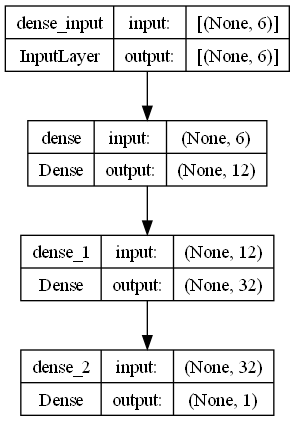

In [12]:
## Plot layer
tf.keras.utils.plot_model(model_sequential_2,show_shapes=True)

In [61]:
history_seq_2=model_sequential_2.fit(X_train_final,
                                 y_train,
                                 epochs=40,
                                 validation_data=(X_val_final,y_val),
                                 batch_size=10,
                                 callbacks=[callback])

Epoch 1/40
2664/2664 [==============================] - 20s 7ms/step - loss: 0.3716 - accuracy: 0.8266 - val_loss: 0.3063 - val_accuracy: 0.8503
Epoch 2/40
2664/2664 [==============================] - 19s 7ms/step - loss: 0.3006 - accuracy: 0.8542 - val_loss: 0.2881 - val_accuracy: 0.8585
Epoch 3/40
2664/2664 [==============================] - 16s 6ms/step - loss: 0.2829 - accuracy: 0.8637 - val_loss: 0.2648 - val_accuracy: 0.8742
Epoch 4/40
2664/2664 [==============================] - 17s 6ms/step - loss: 0.2416 - accuracy: 0.8989 - val_loss: 0.2163 - val_accuracy: 0.9167
Epoch 5/40
2664/2664 [==============================] - 18s 7ms/step - loss: 0.2168 - accuracy: 0.9182 - val_loss: 0.2021 - val_accuracy: 0.9249
Epoch 6/40
 179/2664 [=>............................] - ETA: 15s - loss: 0.1899 - accuracy: 0.9352

KeyboardInterrupt: 

In [ ]:
history_seq_df_2=pd.DataFrame(history_seq_2.history)

<Axes: >

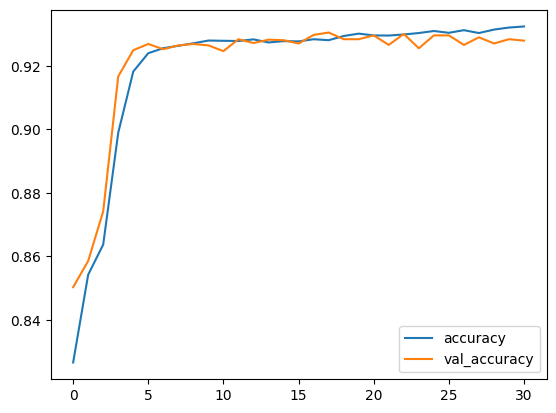

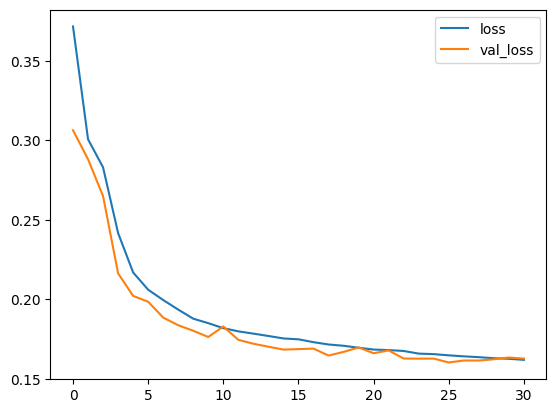

In [ ]:
history_seq_df_2[["accuracy","val_accuracy"]].plot()
history_seq_df_2[["loss","val_loss"]].plot()

model telihat lebih bagus dibandingkan dengan model sequential pertama

833/833 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     12225
           1       0.94      0.94      0.94     14408

    accuracy                           0.93     26633
   macro avg       0.93      0.93      0.93     26633
weighted avg       0.93      0.93      0.93     26633



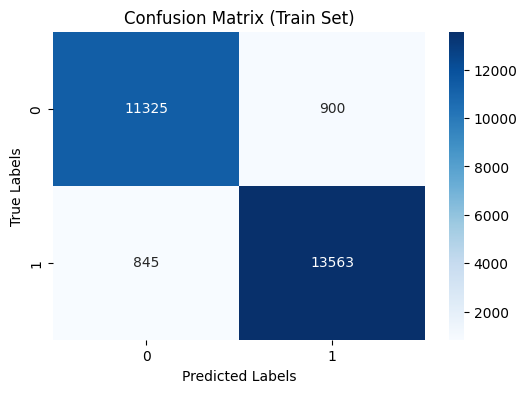

------------------------------------------------------
116/116 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1698
           1       0.93      0.94      0.94      2002

    accuracy                           0.93      3700
   macro avg       0.93      0.93      0.93      3700
weighted avg       0.93      0.93      0.93      3700



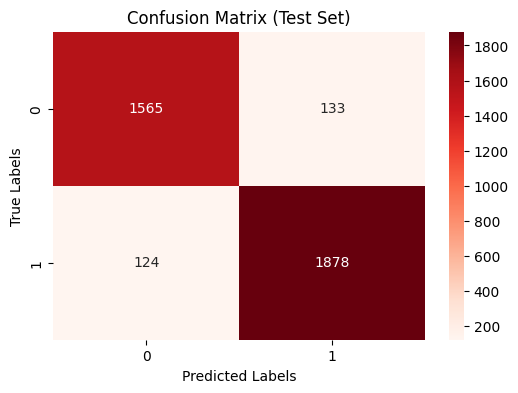

In [ ]:
#lihat Classification score
y_pred_train_seq=model_sequential_2.predict(X_train_final)
y_pred_seq=np.where(y_pred_train_seq >=0.5,1,0)
print(classification_report(y_train,y_pred_seq))
# Confusion matrix untuk train set 
cm_train = confusion_matrix(y_train, y_pred_seq)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print("------------------------------------------------------")
#lihat Classification score
y_pred_test_seq=model_sequential_2.predict(X_test_final)
y_pred_seq=np.where(y_pred_test_seq >=0.5,1,0)
print(classification_report(y_test,y_pred_seq))
# Confusion matrix untuk test set 
cm_train = confusion_matrix(y_test, y_pred_seq)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


model tidak lagi memiliki bias terhadap 0 atau 1

### Functional API 2

In [ ]:
seed=20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Input layer
input_layer = Input(shape=(6,))

# Hidden layer 1
hidden_layer_1 = Dense(12,
                       activation=LeakyReLU(alpha=0.01),
                       kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)

# Hidden layer 2
hidden_layer_2 = Dense(24,
                       activation=LeakyReLU(alpha=0.01),
                       kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)

# Concatenate input layer, hidden layer 1, and hidden layer 2
concat_layer = concatenate([input_layer, hidden_layer_1, hidden_layer_2])

# Output layer
output_layer = Dense(1,
                     activation="sigmoid",
                     kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

# Create the model
model_functional_2 = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model_functional_2.compile(loss="binary_crossentropy",
                         optimizer="adam",
                         metrics=["accuracy"])

# Print model summary
model_functional_2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 12)           84          ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 24)           312         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 42)           0           ['input_1[0][0]',                
                                                                  'dense[0][0]',              

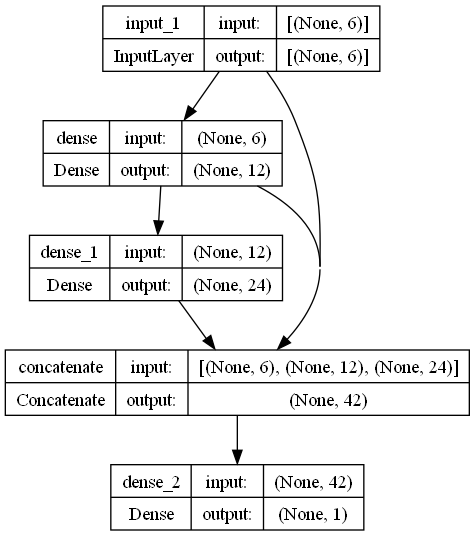

In [ ]:
## Plot layer
tf.keras.utils.plot_model(model_functional_2,show_shapes=True)

In [ ]:
history_func_2=model_functional_2.fit(X_train_final,
                                 y_train,
                                 epochs=50,
                                 validation_data=(X_val_final,y_val),
                                 batch_size=10,
                                 callbacks=[callback])

Epoch 1/50
2664/2664 [==============================] - 20s 7ms/step - loss: 0.3700 - accuracy: 0.8293 - val_loss: 0.3069 - val_accuracy: 0.8512
Epoch 2/50
2664/2664 [==============================] - 20s 7ms/step - loss: 0.3027 - accuracy: 0.8525 - val_loss: 0.2903 - val_accuracy: 0.8518
Epoch 3/50
2664/2664 [==============================] - 20s 7ms/step - loss: 0.2866 - accuracy: 0.8596 - val_loss: 0.2832 - val_accuracy: 0.8585
Epoch 4/50
2664/2664 [==============================] - 20s 7ms/step - loss: 0.2689 - accuracy: 0.8751 - val_loss: 0.2522 - val_accuracy: 0.8814
Epoch 5/50
2664/2664 [==============================] - 20s 7ms/step - loss: 0.2471 - accuracy: 0.8955 - val_loss: 0.2293 - val_accuracy: 0.9060
Epoch 6/50
2664/2664 [==============================] - 21s 8ms/step - loss: 0.2270 - accuracy: 0.9117 - val_loss: 0.2121 - val_accuracy: 0.9162
Epoch 7/50
2664/2664 [==============================] - 21s 8ms/step - loss: 0.2095 - accuracy: 0.9199 - val_loss: 0.1966 - val_ac

<Axes: >

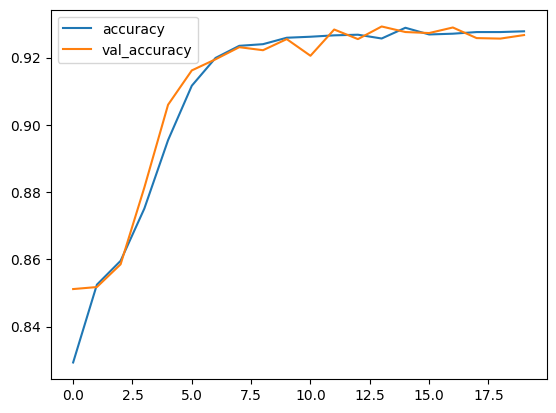

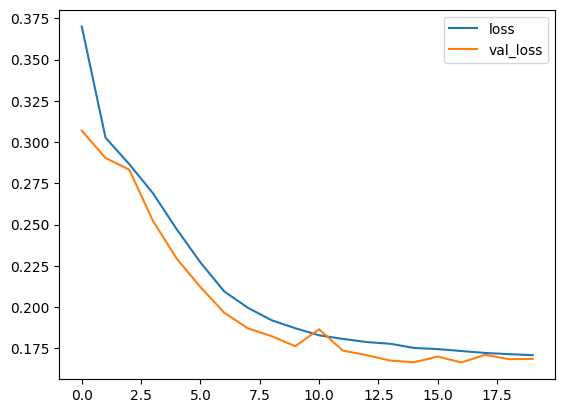

In [ ]:
history_func_df_2=pd.DataFrame(history_func_2.history)
history_func_df_2[["accuracy","val_accuracy"]].plot()
history_func_df_2[["loss","val_loss"]].plot()

jika dilihat model mungkin masih akan lebih baik jika epochnya ditambah. tetapi sudah diberhentikan duluan oleh EarlyStopper

833/833 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     12225
           1       0.90      0.98      0.94     14408

    accuracy                           0.93     26633
   macro avg       0.93      0.92      0.93     26633
weighted avg       0.93      0.93      0.93     26633



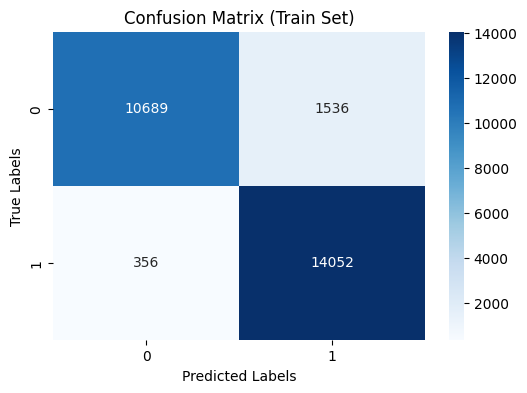

------------------------------------------------------
116/116 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1698
           1       0.90      0.96      0.93      2002

    accuracy                           0.92      3700
   macro avg       0.92      0.92      0.92      3700
weighted avg       0.92      0.92      0.92      3700



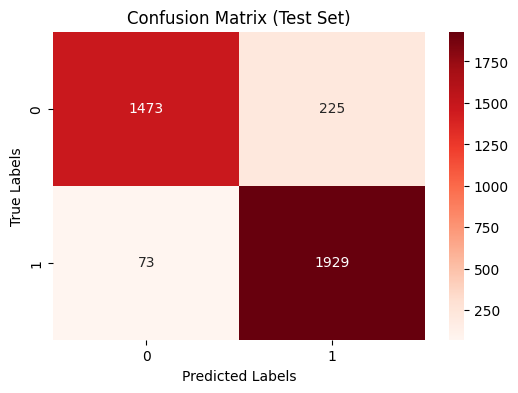

In [ ]:
#lihat Classification score
y_pred_train_func=model_functional_2.predict(X_train_final)
y_pred_func=np.where(y_pred_train_func >=0.5,1,0)
print(classification_report(y_train,y_pred_func))
# Confusion matrix untuk train set 
cm_train = confusion_matrix(y_train, y_pred_func)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Train Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print("------------------------------------------------------")
#lihat Classification score
y_pred_test_func=model_functional_2.predict(X_test_final)
y_pred_func=np.where(y_pred_test_func >=0.5,1,0)
print(classification_report(y_test,y_pred_func))
# Confusion matrix untuk test set 
cm_train = confusion_matrix(y_test, y_pred_func)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Model Masih memiliki bias memprediksikan false positive yang lebih besar dibandingkan dengan model func pertama

## 8. Kesimpulan, Insight, Future Improvement, dan Implementasi Bisnis

> __Kesimpulan__

1. Seluruh model yang dibuat memiliki sifat goodfit dan layak digunakan untuk kedepanya

2. Meskipun Keseluruhan model memiliki nilai yang hampir sama, Model Sequential 2 lebih baik karena tidak memiliki kecenderungan memprediksi false positive ataupun false negative


> __Insight EDA__

1. Hampir dari kesuluruhan kolom kategorik memiliki persebaran isi yang sama besar

2. kolom feedback memiliki cardinality yang cukup besar, tetapi karena encoding menggunakan ordinal encoder sehingga menurut saya tidak cocok untuk dikurangi cardinalitynya

3. Sebagian besar customer masih aktif untuk login kedalam aplikasi atau website.

4. Sebagian besar feedback adalah feedback negative sehingga harus dilihat kembali cara menanggulanginya bagaimana

> __Future Improvement__

1. Ada 2 feature yang sebenarnya layak dipakai tetapi tidak dipakai untuk menghindari imputasi data yang ditakutkan akan membuat data menjadi bias. sehingga jika ada pembaharuan dari model ini dengan data yang tidak ada nullnya diharapkan ke 2 fitur itu ("joined_through_referral, dan "prefered_offer_type") bisa dipakai kedepanya

> __Implementasi Bisnis__

1. Dengan model ini kita bisa melihat customer mana yang diprediksi akan churn, dan diberikan promosi seperti diskon atau cicilan 0 persen agar customer makin setia

2. Penggunaan iklan yang berlebihan harus dikurangi karena mengganggu customer. iklan dapat ditujukan kepada calon customer yang belum pernah berbelanja di sini

3. Produk-produk yang memiliki rating yang buruk lebih baik dihentikan penjualanya

## 9. Save Model

In [ ]:
#Save Pipeline
with open("final_pipeline.pkl","wb")as file_1:
  pickle.dump(final_pipeline,file_1)

#freeze Model
model_sequential_2.trainable=False
model_sequential_2.summary()

#save Model
model_sequential.save("churn_model.h5")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                84        
                                                                 
 dense_7 (Dense)             (None, 32)                416       
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 533
Trainable params: 0
Non-trainable params: 533
_________________________________________________________________
